# Finite Element Method

## План

1. Мотивация
2. Общая формулировка метода конечных элементов (FEM)
    - Постановка математической задачи
    - Алгоритм Finite Element Method
    - Аппроксимация и устойчивость
3. Библиотека FEniCS
4. Примеры
    - Уравнение Пуассона
    - Нелинейное уравнение Пуассона (нелинейность)
    - Уравнение теплопроводности (временная зависимость)
    - Уравнение Навье-Стокса (система уравнений)
5. Домашнее задание

## Мотивация

Хотя изученный ранее метод конечных элементов достаточно прост в освоении и подходит для решения большинства задач, он требует тонкой настройки под каждое конкретное УРЧП и граничные условия.

Нужен более универсальный метод - таким и является __Finite Element Method__.

## Общая формулировка метода конечных элементов (FEM)
### Постановка математической задачи

Пусть имеем какое-либо уравнение в частных производных с заданными начальными/граничными условиями. В общем случае, его можно записать в операторном виде:

$$
\hat{L}(u)=f(\vec x)
$$

где функция $f(\vec x)$ - не зависит от искомого решения $u$, а оператор $\hat{L}$ в общем случае может быть даже нелинейным. Решение необходимо найти на области $\Omega$.

__Примеры:__
- Линейный оператор по координате (Задача Пуассона)
  
$$
\hat{L}(u) = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}
$$

- Линейный оператор c эволюцией по времени с переменными коэффициентами

$$
\hat{L}(u) = \frac{\partial u}{\partial t} - \sin y \cdot \frac{\partial^2 u}{\partial x^2} - x\cdot\frac{\partial^2 u}{\partial y^2}
$$

- Линейный оператор с высшими производными и переменными коэффициентами

$$
\hat{L}(u) = \frac{\partial^3 u}{\partial x^3} - \frac{\partial^4 u}{\partial y^2 \partial x^2}
$$

- Нелинейный оператор

$$
\hat{L}(u) = \Delta u+u-u^3
$$

### Алгоритм Finite Element Method

Опишем "скелет" метода __FEM__:

>1. Искомую функцию записываем в виде линейной комбинации известных функций (условный __базис__) $\{\phi_i(x)\}_{i=1}^N$:
>   
>$$
u(\vec x) \approx u^N(\vec x)=\sum_{i=1}^N u_i \cdot \phi_i(\vec x), \quad u_i \in \mathbb R
$$
>
>2. Подставляем $u^N(\vec x)$ в исходное уравнение и получаем __невязку__:
>   
>$$
r^N(\vec x)=\hat L \left(u^N\right) - f(\vec x)
$$
>
>3. Записываем условие ортогональности невязки и __тестовых функций__ - так называемую __слабую форму__. Для простоты в качестве тестовых функций возьмём наш "базис" (условие Голёркина - часто приводит к нефизичным осцилляциям решения):
>
>$$
\int_{\Omega} r^N(\vec{x}) \cdot \phi_i(\vec{x}) \cdot d \Omega=0, \quad i \in \overline{1, \ldots, N}
$$
>
>4. Интегрируя, получаем $N$ алгебраических уравнений относительно неизвестных коэффициентов разложения $u_i$. Если исходное УРЧП линейно, то и эта система будет линейной.

__Примечание.__ Основное предположение метода заключается в том, что если невязка  $r^N(\vec x)$ ортогональна всем векторам из хорошего базиса, то она обязана быть близка к нулю $\rightarrow$ мы нашли решение практически удовлетворяющее исходному УРЧП.

Обратите внимание, что в данном подходе нигде явно не фигурирует дискретизация - она как бы "зашита" в выбор базисных функций.

Базисные функции не обязаны быть ортогональными, главное, чтобы коэффициенты разложения определялись единственным образом. Пример базиса в 1D - треугольники на сетке:

| <div style="width:200px">Basis</div> | Image |
|:------:|:---:|
| $$\phi_j(x)= \begin{cases}0 & \text { if } x \notin\left[x_{j-1}, x_{j+1}\right] \\ \frac{x-x_{j-1}}{h} & \text { if } x \in\left[x_{j-1}, x_j\right] \\ \frac{x_{j+1}-x}{h} & \text { if } x \in\left[x_j, x_{j+1}\right]\end{cases}$$ | <img src="https://cdn.mathpix.com/snip/images/IUgHNeTnAaEmWbYyOmF71tbfQN-jz62O0pOtmpoOIAc.original.fullsize.png" alt="image" width="100%" height="auto">|

Для любой сеточно-заданной функции $u^h$ такой набор функций будет базисом (на краю можно добавить половинку треугольника), хотя строго говоря они относятся к разным пространствам: $u^h$ - к сеточным функциям, $\phi_i(x)$ - к непрерывным над $\Omega$.


__Определение.__ __Сетка__ или __mesh__ - это представление области $\Omega$ в виде конечного набора однотипных простых множеств. Ранее мы рассматривали только прямоугольные сетки одинакового размера, но в FEM удобнее использовать неравномерные треугольные/прямоугольные сетки для более точного описания геометрии $\Omega$.

![original image](https://cdn.mathpix.com/snip/images/UyE741cZS03LTlTMusyKTp2qOJHFM5JqZ69gFgQDY8o.original.fullsize.png)

В общем случае (на произвольном mesh), базисные функции будут похожи на одномерный случай - главное выполнение следующего свойства:

$$
\phi_j\left(x_i\right)= \begin{cases}1 & i=j \\ 0 & i \neq j\end{cases}
$$

Таким образом, количество базисных функций должно равняться числу узлов, на которых ищем сеточную функцию $u^h$.

__Определение.__ __Конечный элемент__ или __finite element__ - это тройка $\left(K, \, P_K, \, \Sigma\right)$ где

- $K$ - __элемент__ сетки (ex. треугольничек или интервал);

- $P_K$ - конечномерное линейное пространство полиномов, определенное на $K$ (две прямые в примере выше);

- $\Sigma$ - набор степеней свободы (__DoF__), т.е. значения полинома в вершинах $K$.

Эти три составляющие определяют единственный полином на элементе $K$.

__Пример.__ Как-то так выглядит решение одномерного уравнения Пуассона с $f=-1$ при разных сетках $h$. Ясно видим отличительную особенность метода FEM - вне сетки решение получается нефизичным, но в узлах сетки сходимость крайне быстрая.

![original image](https://cdn.mathpix.com/snip/images/2tLKp3ya4E72uxw2_XMqKcKFfaFlImHTeWEpL4HoWqM.original.fullsize.png)

__Пример.__ То же самое уравнение, но с другим базисом. На этот раз используются параболы. За деталями см. дополнительные материалы.

![original image](https://cdn.mathpix.com/snip/images/hBfT6Bda24KiErLXBa2YnZo7uKj-JrsC8OGhBPb9iKY.original.fullsize.png)

### Аппроксимация и устойчивость

__Аппроксимация__

Если базисные функции - полиномы р степени, а решение нашей задачи $\mathrm{p}+1$ раз дифференциируемо, то

$$
\left\|u-u_h\right\|_{L^2(\Omega)} \leqslant c \cdot h^{p+1}\cdot \|u\|_{H^{p+1}(\Omega)},
$$

где

$$
\|f\|_{H^p}=\left(\int_{\Omega}|f|^2+|\nabla f|^2+\ldots+\left|\nabla^p f\right|^2\right)^{\frac{1}{p}}
$$

Если же решение не обладает таким количеством производных, то аппрокимация определяется исходя из максимального порядка производной.

В случае с уравнением Пуассона получаем, что $\mathrm{p}=1$ и

$$
\left\|u-u_h\right\|_{L^2(\Omega)} \leqslant c \cdot h^2 \cdot \|u\|_{H^2(\Omega)},
$$

__Устойчивость__

Устойчивость решения задачи определяется устойчивостью решения системы линейных уравнений. При плохо выбранном базисе мы получим плохо обусловленную матрицу.


## Библиотека FEniCS

FEniCS - это популярная вычислительная платформа с открытым исходным кодом для решения дифференциальных уравнений (PDE) методом конечных элементов ( FEM). FEniCS позволяет пользователям быстро преобразовывать научные модели в эффективный конечно-элементный код. Благодаря высокоуровневым интерфейсам Python и C++ к FEniCS легко приступить к работе, но FEniCS предлагает также мощные возможности для более опытных программистов.

>__Алгоритм__
>
>Выпишем алгоритм действий для решения задачи с помощью метода конечных элементов.
>1. Перевести уравнение в "слабую" форму.
>2. Выбрать пространство функций, на котором ищется ответ.
>3. Составить и решить систему линейных уравнений на коэффициенты.

Всё, кроме 1-го шага, сделает за нас fenics.

__Примечание.__ Следующий код рекомендуется выполнять на google colab - феникс достаточно прожорливый по месту на диске + скорее всего его невозможно запустить на windows (гуглите wsl).

## Примеры

Спасибо Дамиру Гайфутдинову за написание последующих материалов.

### Уравнение Пуассона

$$
\begin{aligned}
-\Delta u=f & \text { in } \Omega, \\
u=u_0 & \text { on } \partial \Omega .
\end{aligned}
$$

1. __Перевести уравнение в слабую форму__

Давайте домножим уравнение на функцию $v$, которая равна нулю на границе, и проинтегрируем его. Эта функция называется тестовой.

__Определение 1.__ $H_1(\Omega)$ - Пространство функций с конечным интегралом от $v^2 u|\nabla v|^2$.

Единичка внизу говорит про количество производных, интеграл от квадрата которых конечен.

__Определение 2.__ Тестовая функция - $v \in H_1(\Omega): v(\partial \Omega)=0$.
$$
-\int_{\Omega}(\Delta u) v \mathrm{~d} x=\int_{\Omega} f v \mathrm{~d} x
$$

Проинтегрируем по частям. Идея состоит в том, чтобы убрать старшие производные, точность приближения которых меньше.

$$
-\int_{\Omega}(\Delta u) v \mathrm{~d} x=\int_{\Omega} \nabla u \cdot \nabla v \mathrm{~d} x-\int_{\partial \Omega} \frac{\partial u}{\partial n} v \mathrm{~d} s
$$

Последний член занулятеся, так как $\mathrm{v}=0$ на границе. И мы приходим к уравнению в слабой форме.

$$
\int_{\Omega} \nabla u \cdot \nabla v \mathrm{~d} x=\int_{\Omega} f v \mathrm{~d} x
$$

__Определение 3.__ __Слабая форма__ - уравнение вида $a(u, v)=L(v)$, где $a$ - билинейная форма, $L$ - линейная форма.

Наша основная задача - получить уравнение в таком виде.
Каждая из этих функций ($u$, $v$) принадлежит бесконечномерному пространству функций с конечным интегралом от квадрата производной. Компьютер умеет работать с конечными простраствами, поэтому решения мы будем искать на конечномерных подпространствах. Но как же их выбрать?

Если у оператора есть собственные функции, то ортогональный базис из первых n функций самый лучший набор.

Однако такое есть не всегда.

2. __Выбрать пространство функций, на котором ищется ответ__

Начиная с этого пункта, за нас всё будет делать fenics. Приводим сами вычисления только для понимания происходящего.

Далее мы будем рассматривать одномерную задачу на отрезке $[0,1]$, где $\mathrm{f}=1, \; \mathrm{u}(0)=\mathrm{a}, \; \mathrm{u}(1)=\mathrm{b}$.

Разобьем отрезок на $\mathrm{N}+2$ части. И выберем простой набор функций, так чтобы как можно больше из них были ортогональны. Ортогональность значительно упрощает вычисления, и это мы увидим ниже.

Пусть $\phi_j$ будет линейной функцией на отрезках $[(\mathrm{j}-1) \mathrm{h}, \mathrm{jh}]$ и $[\mathrm{jh},(\mathrm{j}+1) \mathrm{h}]$, где $\mathrm{h}=1 /(\mathrm{N}+1)$. Отдельно рассмотрим $\phi_0$ и $\phi_{N+1}$. Эти функции нужны, чтобы задать начальные условия.

![original image](https://cdn.mathpix.com/snip/images/2k2uZuZUYd4rDe84V72J3qdjZf240gRHZ4AYvoMDXRI.original.fullsize.png)

Итак, мы ищем решение в виде $u^h=\sum_{j=0}^{N+1} u_j \phi_j$. Буква $\mathrm{h}$ значит, что это решение для конечномерного пространства.

Давайте зададим пространство пробных функций почти также. Мы знаем, что всякая тестовая функция зануляется на границе, поэтому коэффициенты перед $\phi_0, \phi_{N+1}$ равны 0 . Значит, $v^h=\sum_{j=1}^N v_j \phi_j$

Вспомним нашу задачу.
$$
\int_{[0,1]} \nabla u \cdot \nabla v \mathrm{~d} x=\int_{[0,1]} f v \mathrm{~d} x .
$$

Скалярное произведение линейно по каждому аргументу, поэтому нам не надо проверять его для произвольной функции $v$. Достаточно убедится, что оно выполняется на базисных функциях.

3. __Составить и решить систему линейных уравнений на коэффициенты__

$$
\begin{aligned}
& \left(u_h^{\prime}, \phi_h^{\prime}\right)=\left(f, \phi_h\right) \quad \forall \phi_h \\
& \Leftrightarrow\left(\left(\sum_{j=1}^n u_j \phi_j\right)^{\prime}, \phi_h^{\prime}\right)=\left(f, \phi_h\right) \quad \forall \phi_h \\
& \Leftrightarrow \sum_{j=1}^n u_j\left(\phi_j^{\prime}, \phi_h^{\prime}\right)=\left(f, \phi_h\right) \quad \forall \phi_h \\
& \Leftrightarrow \sum_{j=1}^n u_j\left(\phi_j^{\prime}, \phi_i^{\prime}\right)=\left(f, \phi_i\right) \quad \forall 1 \leq i \leq n \\
& \underbrace{\left(\begin{array}{cccc}
\left(\phi_1^{\prime}, \phi_1^{\prime}\right) & \left(\phi_1^{\prime}, \phi_2^{\prime}\right) & \cdots & \left(\phi_1^{\prime}, \phi_n^{\prime}\right) \\
\left(\phi_2^{\prime}, \phi_1^{\prime}\right) & \left(\phi_2^{\prime}, \phi_2^{\prime}\right) & \cdots & \left(\phi_2^{\prime}, \phi_n^{\prime}\right) \\
\vdots & \vdots & \ddots & \vdots \\
\left(\phi_n^{\prime}, \phi_1^{\prime}\right) & \left(\phi_n^{\prime}, \phi_2^{\prime}\right) & \cdots & \left(\phi_n^{\prime}, \phi_n^{\prime}\right)
\end{array}\right)}_{=A} \underbrace{\left(\begin{array}{c}
u_1 \\
u_2 \\
\vdots \\
u_n
\end{array}\right)}_{=U}=\underbrace{\left(\begin{array}{c}
\left(f, \phi_1\right) \\
\left(f, \phi_2\right) \\
\vdots \\
\left(f, \phi_n\right)
\end{array}\right)}_{=F} \\
&
\end{aligned}
$$

Заметим, что здесь нет $\phi_0, \phi_{N+1}$, потому что они не принадлежат пространству тестовых функций. Они определяются с помощью начальных условий.

$$
\begin{aligned}
\int_{\Omega} \phi_i^{\prime}(x) \phi_i^{\prime}(x) d x & =\int_{x_{i-1}}^{x_{i+1}} \phi_i^{\prime}(x) \phi_i^{\prime}(x) d x \\
= & \int_{x_{i-1}}^{x_i} \frac{1}{h^2} d x+\int_{x_i}^{x_{i+1}}\left(-\frac{1}{h}\right)^2 d x \\
=\frac{h}{h^2} & +\frac{h}{h^2}=\frac{2}{h} \\
\int_{\Omega} \phi_i^{\prime}(x) \phi_{i \pm 1}^{\prime}(x) d x & =\int_{x_{i-1}}^{x_{i+1}} \phi_i^{\prime}(x) \phi_{i \pm 1}^{\prime}(x) d x \\
& =\int_{x_i}^{x_{i+1}}\left(-\frac{1}{h}\right) \cdot \frac{1}{h} d x \\
& =-\frac{h}{h^2}=-\frac{1}{h}
\end{aligned}
$$

Остальные интегралы занулятся. В итоге матрица получится сильно разреженной, с диагональным преобладанием и хорошо обусловленная.

Добавим уравнения на $\phi_0, \phi_{N+1}$. В итоге получим:

$$
\begin{aligned}
& A=\frac{1}{h}\left(\begin{array}{ccccc}
1 & 0 & & & 0 \\
-1 & 2 & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 & -1 \\
0 & & & 0 & 1
\end{array}\right) \\
& F=h \cdot(a, 1, \ldots, 1, b)^T
\end{aligned}
$$

In [1]:
# Данный код протестирован только в Google Colab
# Уточните, как устанавливать FEniCS на вашу систему

try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl_legacy
    import dolfin
else:
    try:
        import ufl_legacy
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl_legacy
        import dolfin

ModuleNotFoundError: No module named 'ufl_legacy'

In [1]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'fenics'

In [3]:
N_ELEMENTS = 20
mesh = fe.UnitSquareMesh(N_ELEMENTS, N_ELEMENTS) #Определяем сетку на которой будем искать решение

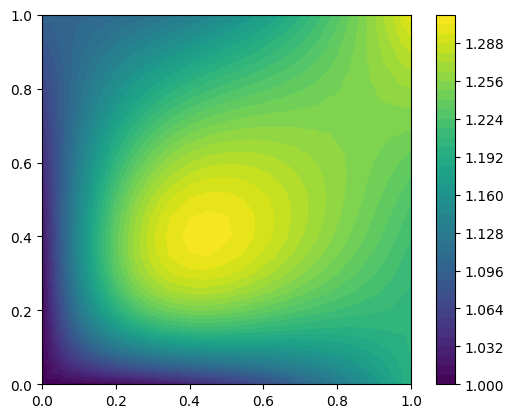

In [4]:
lagr_polinomial_first_order = fe.FunctionSpace(
        mesh,
        "Lagrange",
        2,
)#Определяем пространство функций. Оно общее для тестовых функций и для нашего приближенного решения.
#Здесь я использую линейные функции, которые описал в файле.

#зададим начальное условие.
u0 = fe.Expression("1 + 0.2*x[0]*x[0] + 0.1*x[1]*x[1]", degree = 1)
u0 = fe.interpolate(u0, lagr_polinomial_first_order)

#Эта функция нужна для скрытых методов сетки. on_boundary булева переменная,
#которая приходит из автоматической проверки точки на принедлежность границе.
#можно переписать функию и не использовать on_boundary.
def on_boundary(x, on_boundary):
    return on_boundary

#Граничные условия
bc = fe.DirichletBC(
    lagr_polinomial_first_order,
    u0,
    on_boundary,
)

#задаем функции для составления основного уравнения
u = fe.TrialFunction(lagr_polinomial_first_order)
v = fe.TestFunction(lagr_polinomial_first_order)
u_solution = fe.Function(lagr_polinomial_first_order)


#Определим f
sigma = 0.3
x0 = 0.2
y0 = 0.2

f = fe.Expression("7*exp(-0.5*(pow((x[0] - x0)/sigma, 2)) "\
                    " - 0.5*(pow((x[1] - y0)/sigma, 2)))",
                   x0=x0, y0=y0, sigma=sigma, degree = 2)

#Замечу, что константы определяются так, а не через expression. Можно попробовать подставить f1 в решение.
f1 = fe.Constant("0.0")


#составим уравнение
A = fe.dot(fe.grad(u), fe.grad(v)) * fe.dx
L = f * v * fe.dx

fe.solve(A == L, u_solution, bc)

pl = fe.plot(u_solution)
#fe.plot(mesh) #сетка
plt.colorbar(pl)
plt.show()
#fe.interactive()

### Нелинейное уравнение Пуассона

Или как работать с нелинейностями?

$$
\begin{cases}-\nabla \cdot(q(u) \nabla u)=0 & \text { in } \Omega=[0,1], \\ u=u_0 & \text { on } \partial \Omega\end{cases}
$$

Есть два простых метода решения этой задачи. Оба основаны на последовательном приближении к ответу.

1. __Метод итераций (метод Пикарда)__

__Идея__: по текущему прилижению определить следующее

$$
-\nabla \cdot\left(q^k\left(u^k\right) \nabla u^{k+1}\right)=0 \quad \text { in } \Omega=[0,1],
$$

В слабой форме получим:

$$
\int_{\Omega} q\left(u^k\right) \nabla u^{k+1} \cdot \nabla v \mathrm{~d} x=0
$$

Продолжаем итерацию, пока решение на новом шаге будет слабо отличатся от текущего решения.

2. __Метод Ньютона__
__Идея__: по текущему приближению определить возмущение, которое улучшит приближение.

$$
\begin{aligned}
& u^{k+1}=u^k+\delta u \\
& q\left(u^{k+1}\right)=q\left(u^k\right)+q^{\prime}\left(u^k\right) \delta u+\mathcal{O}\left((\delta u)^2\right) \approx q\left(u^k\right)+q^{\prime}\left(u^k\right) \delta u
\end{aligned}
$$

Подставим это в исходное уравнение, отбрасывая члены второго порядка.

$$
\begin{gathered}
\nabla \cdot\left(q\left(u^k\right) \nabla u^k\right)+\nabla \cdot\left(q\left(u^k\right) \nabla \delta u\right)+\nabla \cdot\left(q^{\prime}\left(u^k\right) \delta u \nabla u^k\right)=0 \\
\nabla \cdot\left(q\left(u^k\right) \nabla \delta u\right)+\nabla \cdot\left(q^{\prime}\left(u^k\right) \delta u \nabla u^k\right)=-\nabla \cdot\left(q\left(u^k\right) \nabla u^k\right)
\end{gathered}
$$

Домножая на тестовую функцию и проводя интегрирование по частям, приходим к слабой форме.

$$
\int_{\Omega}\left(q\left(u^k\right) \nabla \delta u \cdot \nabla v+q^{\prime}\left(u^k\right) \delta u \nabla u^k \cdot \nabla v\right) \mathrm{d} x=-\int_{\Omega} q\left(u^k\right) \nabla u^k \cdot \nabla v \mathrm{~d} x
$$

Видно, что уравнение имеет вид:

_Билинейная форма $(\delta u, v)=$ Линейная форма $(v)$._

__Важные детали__:
1. Начальное приближение мы не знаем, поэтому придется угадывать. Чем лучше догадка, тем быстрее мы сойдемся к ответу.
2. Возмущение должно зануляться на границе

In [5]:
mesh = fe.UnitIntervalMesh(40)
V = fe.FunctionSpace(mesh, "Lagrange", 1)


tol = 1e-14

def left_boundary(x, on_boundary):
    return on_boundary and abs(x[0]) < tol


def right_boundary(x, on_boundary):
    return on_boundary and abs(x[0]-1) < tol


Gamma_0 = fe.DirichletBC(V, fe.Constant(0.0), left_boundary)
Gamma_1 = fe.DirichletBC(V, fe.Constant(1.0), right_boundary)


bcs = [Gamma_0, Gamma_1]
# Найдем начальное приближение (q(u)=1, m=0)
u = fe.TrialFunction(V)
v = fe.TestFunction(V)
a = fe.inner(fe.nabla_grad(u), fe.nabla_grad(v))*fe.dx
f = fe.Constant(0.0)
L = f*v*fe.dx
A, b = fe.assemble_system(a, L, bcs)
u_k = fe.Function(V)
U_k = u_k.vector()
fe.solve(A, U_k, b)

1

Text(0.5, 1.0, 'Inital guess')

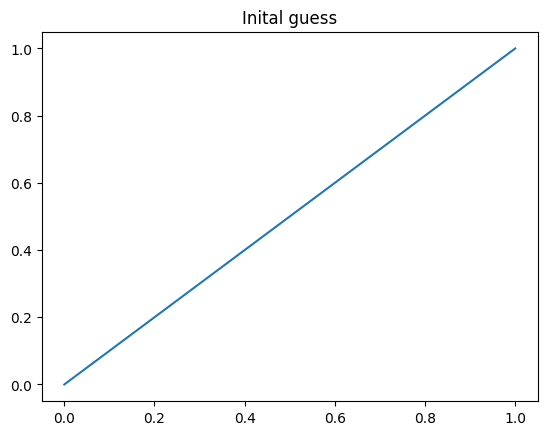

In [6]:
fe.plot(u_k)
plt.title('Inital guess')

In [7]:
#добавим граничные условия для возмущения du
Gamma_0_du = fe.DirichletBC(V, fe.Constant(0), left_boundary)
Gamma_1_du = fe.DirichletBC(V, fe.Constant(0), right_boundary)
bcs_du = [Gamma_0_du, Gamma_1_du]

In [8]:
m = 8

def q(u):
    return (1+u)**m

#производная от q
def Dq(u):
    return m*(1+u)**(m-1)


du = fe.TrialFunction(V) # u = u_k + omega*du
a = fe.inner(q(u_k)*fe.nabla_grad(du), fe.nabla_grad(v))*fe.dx + \
    fe.inner(Dq(u_k)*du*fe.nabla_grad(u_k), fe.nabla_grad(v))*fe.dx
L = -fe.inner(q(u_k)*fe.nabla_grad(u_k), fe.nabla_grad(v))*fe.dx

In [9]:
du = fe.Function(V)
u = fe.Function(V) # u = u_k + omega*du
omega = 1.0 # relaxation parameter
eps = 1.0
tol = 1.0E-5
iter = 0
maxiter = 25
while eps > tol and iter < maxiter:
    iter += 1
    A, b = fe.assemble_system(a, L, bcs_du)
    fe.solve(A, du.vector(), b)
    eps = np.linalg.norm(du.vector(), ord=np.Inf)
    print("Norm:", eps)
    u.vector()[:] = u_k.vector() + omega*du.vector()
    u_k.assign(u)

Norm: 2.6926580821284225
Norm: 0.42678052234021463
Norm: 0.3790764929916502
Norm: 0.3362295391794988
Norm: 0.29701382866741033
Norm: 0.25931623334952986
Norm: 0.2189422903508294
Norm: 0.1703542478525539
Norm: 0.10525359212091752
Norm: 0.03666912499970038
Norm: 0.0037568546653569818
Norm: 3.590420381359272e-05
Norm: 3.2438027096345295e-09


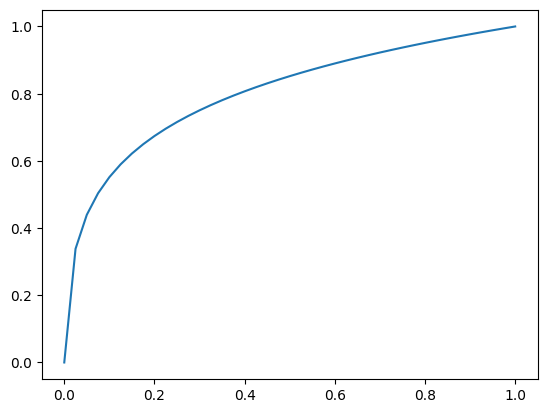

In [10]:
fe.plot(u_k)

### Уравнение теплопроводности

Или как работать с изменением по времени?

$$
\left\{\begin{array}{lll}
\frac{\partial u}{\partial t}=\alpha \frac{\partial^2 u}{\partial x^2} & \text { in } \Omega=[0,1] & t>0 \\
u=u_0 & \text { on } \partial \Omega & t>0 \\
u=I & \text { in } \Omega & t=0
\end{array}\right.
$$

Дискретизуем уравнение по времени, а потом решаем с помощью конечных элементов.

$$
\frac{u^{[t+1]}-u^{[t]}}{\Delta t}=\alpha \frac{\partial^2}{\partial x^2} u^{[t+1]}
$$

Приведем его к слабой форме.

$$
\begin{aligned}
& \int_{\Omega}\left(u^{[t+1]}-u^{[t]}\right) v=\alpha \Delta t \int_{\Omega} \frac{\partial^2}{\partial x^2} u^{[t+1]} v \\
& \int_{\Omega}\left(u^{[t+1]}-u^{[t]}\right) v=-\alpha \Delta t \int_{\Omega} \frac{\partial}{\partial x} u^{[t+1]} \frac{\partial}{\partial x} v . \\
& \int_{\Omega} u^{[t+1]} v-\alpha \Delta t \nabla u^{[t+1]} \nabla v d x=\int_{\Omega} u^{[t]} v d x
\end{aligned}
$$

Уравнение имеет вид:

_Билинейная форма $\left(u^{[t+1]}, v\right)=$ Линейная форма $(v)$
(Мы знаем $u^{[t]}$ с предыдущего шаг)._

In [11]:
N_elements = 20
mesh = fe.UnitIntervalMesh(N_elements)

In [12]:
lagr_pol_ford = fe.FunctionSpace(
    mesh,
    'Lagrange',
    1
)

u_on_b_l = fe.Constant(0.0)
u_on_b_r = fe.Constant(-2.0)

def near(x, const, tol):
    return abs(x - const) < tol

def boundary_L(x, on_boundary):
    tol = 1e-14
    return on_boundary and near(x[0], 0, tol)

def boundary_R(x, on_boundary):
    tol = 1e-14
    return on_boundary and near(x[0], 1, tol)

bs_l = fe.DirichletBC(
    lagr_pol_ford,
    u_on_b_l,
    boundary_L,
)

bs_r = fe.DirichletBC(
    lagr_pol_ford,
    u_on_b_r,
    boundary_R,
)

bs = [bs_l, bs_r]

initial_condition = fe.Expression(
    'sin(3.1415 * x[0]) * x[0] * x[0] * exp(2*x[0]) - 2*x[0]',
    degree = 1
)

u_old = fe.interpolate(
    initial_condition,
    lagr_pol_ford
)

dt = 0.1

heat_source = fe.Constant(0.0)

u_trial = fe.TrialFunction(lagr_pol_ford)
v_test = fe.TestFunction(lagr_pol_ford)

In [13]:
weak_form_residuum = (
    u_trial * v_test * fe.dx
    +
    dt * fe.dot(
        fe.grad(u_trial),
        fe.grad(v_test),
    ) * fe.dx
    -
    (
        u_old * v_test * fe.dx
        +
        dt * heat_source * v_test * fe.dx
    )
)

In [14]:
weak_form_lhs = fe.lhs(weak_form_residuum)
weak_form_rhs = fe.rhs(weak_form_residuum)

Text(0, 0.5, 'u')

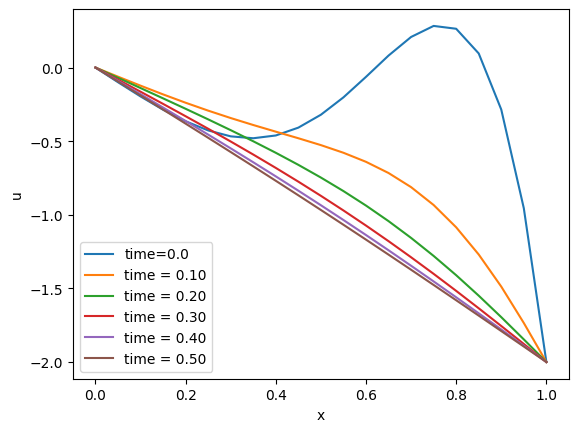

In [15]:
plt.figure()
fe.plot(u_old, label='time=0.0')

n_time_steps = 5
time_current = 0
u_solution = fe.Function(lagr_pol_ford)
for i in range(n_time_steps):
    time_current += dt
    fe.solve(
        weak_form_lhs == weak_form_rhs,
        u_solution,
        bs,
    )
    u_old.assign(u_solution)
    fe.plot(u_solution, label = 'time = {:.2f}'.format(time_current))

plt.legend()
plt.xlabel('x')
plt.ylabel('u')

### Уравнение Навье-Стокса

Или как работать с системой уравнений?

$$
\left\{\begin{array}{l}
\frac{\partial \mathbf{u}}{\partial t}+(\mathbf{u} \cdot \nabla) \mathbf{u}=-\frac{1}{\rho} \nabla p+\nu \nabla^2 \mathbf{u} \\
\nabla \cdot \mathbf{u}=0
\end{array}\right.
$$

Решать задачу будем в квадрате $[0,1] \times[0,1]$.
$$
\begin{aligned}
& u_0=\left[\begin{array}{l}
1 \\
0
\end{array}\right], \text { if } y=1 \\
& u_0=\left[\begin{array}{l}
0 \\
0
\end{array}\right], \text { otherwise }
\end{aligned}
$$

На первый вгзляд вообще не понятно, что делать.
1. Как получить градиент давления?
2. Как учесть условие несжимаемости?

__Идея__: разбить оператор на части. Учесть законы сохранения для получения уравнений.

Давайте разобьем первое уравнение на два, добавив промежуточный слой.

$$
\left\{\begin{array}{l}
\frac{u^*-u^t}{\Delta t}=-\left(u^t \cdot \nabla\right) u^t+\nu \nabla^2 u^*, \\
\frac{u^{t+1}-u^*}{\Delta t}=-\frac{1}{\rho} \nabla p^*
\end{array}\right.
$$

Подействуем на второе уравнение дивиргенцией.

$$
\frac{\nabla \cdot u^{[t+1]}}{\Delta t}-\frac{\nabla \cdot u^*}{\Delta t}=-\nabla^2 p^*
$$

Первое слагаемое зануляется из-за несжимаемости жидкости и мы получаем уравнение Пуассона на давление:

$$
\nabla^2 p^*=\frac{1}{\Delta t} \nabla u^*
$$

Получаем алгоритм:

>1. Найти $u^*$ из $\frac{u^*-u^t}{\Delta t}=-\left(u^t \cdot \nabla\right) u^t+\nu \nabla^2 u^*$
>2. Получить давление из $\nabla^2 p^*=\frac{1}{\Delta t} \nabla u^*$
>3. Перейти к $u^{t+1}$, решив $\frac{u^{t+1}-u^*}{\Delta t}=-\frac{1}{\rho} \nabla p^*$ Переведем все в слабую форму.

Первое уравнение:
$$
\begin{aligned}
\frac{u^*-u^t}{\Delta t} & =-\left(u^t \cdot \nabla\right) u^t+\nu \nabla^2 u^* \\
\int_{\Omega}\left(\frac{u^*-u^t}{\Delta t}\right)^{\top} v & =-\int_{\Omega}\left(\left(u^t \nabla\right) u^t\right)^{\top} v+\int_{\Omega}\left(\nu \nabla^2 u^*\right)^{\top} v \\
\frac{\partial^2}{\partial x_j \partial x_i} u_i v_j & =\frac{\partial}{\partial x_j}\left(\frac{\partial}{\partial x_i} u_i v_j\right)-\frac{\partial}{\partial x_i} u_i \frac{\partial}{\partial x_j} v_j . \\
\int_{\Omega}\left(\nabla^2 u^*\right)^{\top} v & =\int_{\Omega} \nabla\left(\nabla u^* v\right)-\int_{\Omega}\left(\nabla u^*, \nabla v\right)= \\
& =\int_{\partial \Omega} \nabla u^* v-\int_{\Omega}\left(\nabla u^*, \nabla v\right)= \\
& =-\int_{\Omega}\left(\nabla u^*, \nabla v\right)
\end{aligned}
$$

Итого:
$$
\int_{\Omega}\left(\frac{u^*-u^t}{\Delta t}\right)^{\top} v=-\int_{\Omega}\left(\left(u^t \nabla\right) u^t\right)^{\top} v-\int_{\Omega}\left(\nabla u^*, \nabla v\right)
$$

Второе уравнение(q - тестовая функция):
$$
-\int_{\Omega}(p)^{\top}(\nabla q)=\int_{\Omega} \frac{1}{\Delta t}\left(\nabla \cdot u^*\right) q
$$

Третье уравнение:
$$
\int_{\Omega}\left(\frac{u^{t+1}-u^*}{\Delta t}\right)^{\top} v=\int_{\Omega}-(\nabla p)^{\top} v
$$

Поочередно решая эти уравнения можно получить ответ.

In [16]:
from tqdm import tqdm

N_POINTS_P_AXIS = 61

TIME_STEP_LENGTH = 0.01
N_TIME_STEPS = 1000
KINEMATIC_VISCOSITY = 0.01 # -> Re = 100 Чудеса начинаются с Re = 2300
                            # Однако уже при Re = 1000 программа перестает работать


mesh = fe.UnitSquareMesh(N_POINTS_P_AXIS, N_POINTS_P_AXIS)

# Taylor-Hood Elements. Степень многочленов для давления должна быть на 1 меньше
#степени многочленов для скорости
velocity_function_space = fe.VectorFunctionSpace(mesh, "Lagrange", 2)
pressure_function_space = fe.FunctionSpace(mesh, "Lagrange", 1)

u_trial = fe.TrialFunction(velocity_function_space)
p_trial = fe.TrialFunction(pressure_function_space)
v_test = fe.TestFunction(velocity_function_space)
q_test = fe.TestFunction(pressure_function_space)

# По бокам скорость равна 0. Сверху и снизу скорость равна 1. Граничные условия
stationary_wall_boundary_condition = fe.DirichletBC(
    velocity_function_space,
    (0.0, 0.0),
    """
    on_boundary && (x[0] < DOLFIN_EPS || x[0] > (1.0 - DOLFIN_EPS))
    """
)
moving_wall_boundary_condition = fe.DirichletBC(
    velocity_function_space,
    (1.0, 0.0),
    """
    on_boundary && (x[1] > (1.0 - DOLFIN_EPS) || x[1] < DOLFIN_EPS)
    """
)
velocity_boundary_conditions = [stationary_wall_boundary_condition, moving_wall_boundary_condition]


u_prev = fe.Function(velocity_function_space)
u_tent = fe.Function(velocity_function_space)
u_next = fe.Function(velocity_function_space)
p_next = fe.Function(pressure_function_space)

# Слабая форма для первого уравнения
momentum_weak_form_residuum = (
    1.0 / TIME_STEP_LENGTH * fe.inner(u_trial - u_prev, v_test) * fe.dx
    +
    fe.inner(fe.grad(u_prev) * u_prev, v_test) * fe.dx
    +
    KINEMATIC_VISCOSITY * fe.inner(fe.grad(u_trial), fe.grad(v_test)) * fe.dx
)
momentum_weak_form_lhs = fe.lhs(momentum_weak_form_residuum)
momentum_weak_form_rhs = fe.rhs(momentum_weak_form_residuum)

# Слабая форма для второго уравнения на давление
pressure_poisson_weak_form_lhs = fe.inner(fe.grad(p_trial), fe.grad(q_test)) * fe.dx
pressure_poisson_weak_form_rhs = - 1.0 / TIME_STEP_LENGTH * fe.div(u_tent) * q_test * fe.dx

# Слабая форма для последнего уравнения. Переход к новому слою.
velocity_update_weak_form_lhs = fe.inner(u_trial, v_test) * fe.dx
velocity_update_weak_form_rhs = (
    fe.inner(u_tent, v_test) * fe.dx
    -
    TIME_STEP_LENGTH * fe.inner(fe.grad(p_next), v_test) * fe.dx
)

# Магия для ускорения вычисление.
momentum_assembled_system_matrix = fe.assemble(momentum_weak_form_lhs)
pressure_poisson_assembled_system_matrix = fe.assemble(pressure_poisson_weak_form_lhs)
velocity_update_assembled_system_matrix = fe.assemble(velocity_update_weak_form_lhs)

for t in tqdm(range(N_TIME_STEPS)):
    # (1) Решение первого уравнения
    momentum_assembled_rhs = fe.assemble(momentum_weak_form_rhs)
    [bc.apply(momentum_assembled_system_matrix, momentum_assembled_rhs) for bc in velocity_boundary_conditions]
    fe.solve(
        momentum_assembled_system_matrix,
        u_tent.vector(),
        momentum_assembled_rhs,
        "gmres",
        "ilu",
    )

    # (2) Решение второго
    pressure_poisson_assembled_rhs = fe.assemble(pressure_poisson_weak_form_rhs)
    fe.solve(
        pressure_poisson_assembled_system_matrix,
        p_next.vector(),
        pressure_poisson_assembled_rhs,
        "gmres",
        "amg",
    )

    # (3) Решение третьего
    [bc.apply(momentum_assembled_system_matrix, momentum_assembled_rhs) for bc in velocity_boundary_conditions]
    velocity_update_assembled_rhs = fe.assemble(velocity_update_weak_form_rhs)
    fe.solve(
        velocity_update_assembled_system_matrix,
        u_next.vector(),
        velocity_update_assembled_rhs,
        "gmres",
        "ilu",
    )
    u_prev.assign(u_next)

100%|██████████| 1000/1000 [03:37<00:00,  4.60it/s]


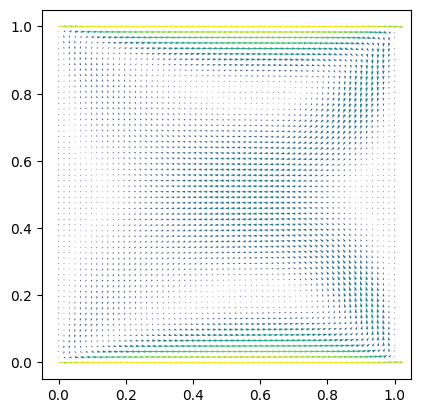

In [17]:
fe.plot(u_next)

## Домашнее задание

1. Придумать и решить какое-нибудь УРЧП используя fenics и метод конечных элементов (не из рассмотренных примеров). С какими проблемами столкнулись? Какая скорость сходимости к истинному (математическому) решению?